In [2]:
import sys
import os
# Add the parent directory to the Python path

# Change the current working directory to /app
os.chdir('/app')
from dotenv import load_dotenv
load_dotenv(dotenv_path='config/.env')
database_path = os.getenv('DATABASE_PATH')
from utils.db.fetch import fetch_entries
print(f'DATABASE_PATH: {database_path}')
market_name = 'crypto_binance' #different from crypto_binance
timeframe='aggtrade'
pair='BTC'

DATABASE_PATH: database/db/ohlcv_data.db


In [3]:
from finstore.finstore import Finstore
finstore = Finstore(market_name=market_name, timeframe=timeframe, enable_append=True)

Len items in 'database/finstore/market_name=crypto_binance/timeframe=aggtrade': 639


In [8]:
import requests
import pandas as pd

# Binance API endpoint for aggTrades
url = "https://api.binance.com/api/v3/aggTrades"

# Define start and end times (in milliseconds)
start_time = int(pd.Timestamp('2025-01-09T21:00:00').timestamp() * 1000)
end_time = int(pd.Timestamp('2025-01-10T00:14:00').timestamp() * 1000)

# Initialize an empty list to collect all trades
all_trades = []

# Loop to fetch data in chunks
while start_time < end_time:
    # Parameters for the query
    params = {
        "symbol": "IQUSDT",
        "startTime": start_time,
        "endTime": end_time,
        "limit": 1000  # Maximum number of records per request
    }
    
    # Make the API request
    response = requests.get(url, params=params)
    response.raise_for_status()  # Raise an exception for HTTP errors

    # Parse the response JSON
    data = response.json()

    # Append the fetched trades to the list
    all_trades.extend(data)

    # If no data is returned, break the loop
    if not data:
        break

    # Update start_time to the timestamp of the last trade + 1 ms
    start_time = data[-1]["T"] + 1

# Convert the collected data into a DataFrame
df = pd.DataFrame(all_trades)

# Convert timestamp to readable datetime format
df["timestamp"] = pd.to_datetime(df["T"], unit="ms")

# Display the resulting DataFrame
df



,a,p,q,f,l,T,m,M,timestamp
0,11513150,0.00795300,6361.00000000,15976349,15976349,1736456401988,True,True,2025-01-09 21:00:01.988
1,11513151,0.00795200,7508.00000000,15976350,15976351,1736456401988,True,True,2025-01-09 21:00:01.988
2,11513152,0.00794900,943.00000000,15976352,15976352,1736456401990,True,True,2025-01-09 21:00:01.990
3,11513153,0.00794800,20749.00000000,15976353,15976355,1736456401990,True,True,2025-01-09 21:00:01.990
4,11513154,0.00795000,6565.00000000,15976356,15976356,1736456403900,False,True,2025-01-09 21:00:03.900
...,...,...,...,...,...,...,...,...,...
42976,11556368,0.01070700,699.00000000,16042951,16042951,1736468039835,True,True,2025-01-10 00:13:59.835
42977,11556369,0.01070600,699.00000000,16042952,16042952,1736468039835,True,True,2025-01-10 00:13:59.835
42978,11556370,0.01070500,699.00000000,16042953,16042953,1736468039835,True,True,2025-01-10 00:13:59.835
42979,11556371,0.01070400,3966.00000000,16042954,16042955,1736468039835,True,True,2025-01-10 00:13:59.835


In [9]:
df.columns

Index(['a', 'p', 'q', 'f', 'l', 'T', 'm', 'M', 'timestamp'], dtype='object')

/tmp/ipykernel_110841/4206269432.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  range1['q'] = pd.to_numeric(range1['q'], errors='coerce')
/tmp/ipykernel_110841/4206269432.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  range2['q'] = pd.to_numeric(range2['q'], errors='coerce')
/tmp/ipykernel_110841/4206269432.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

Stats for 10th Jan 00:00 to 10th Jan 00:14:
  Mean: 16877.61
  Std Dev: 61925.84
  70% Range: -45048.24 to 78803.45


Stats for 9th Jan 23:50 to 10th Jan 00:00:
  Mean: 13637.47
  Std Dev: 33505.38
  70% Range: -19867.91 to 47142.85


Stats for Before 9th Jan 23:00:
  Mean: 17034.70
  Std Dev: 49890.41
  70% Range: -32855.71 to 66925.11




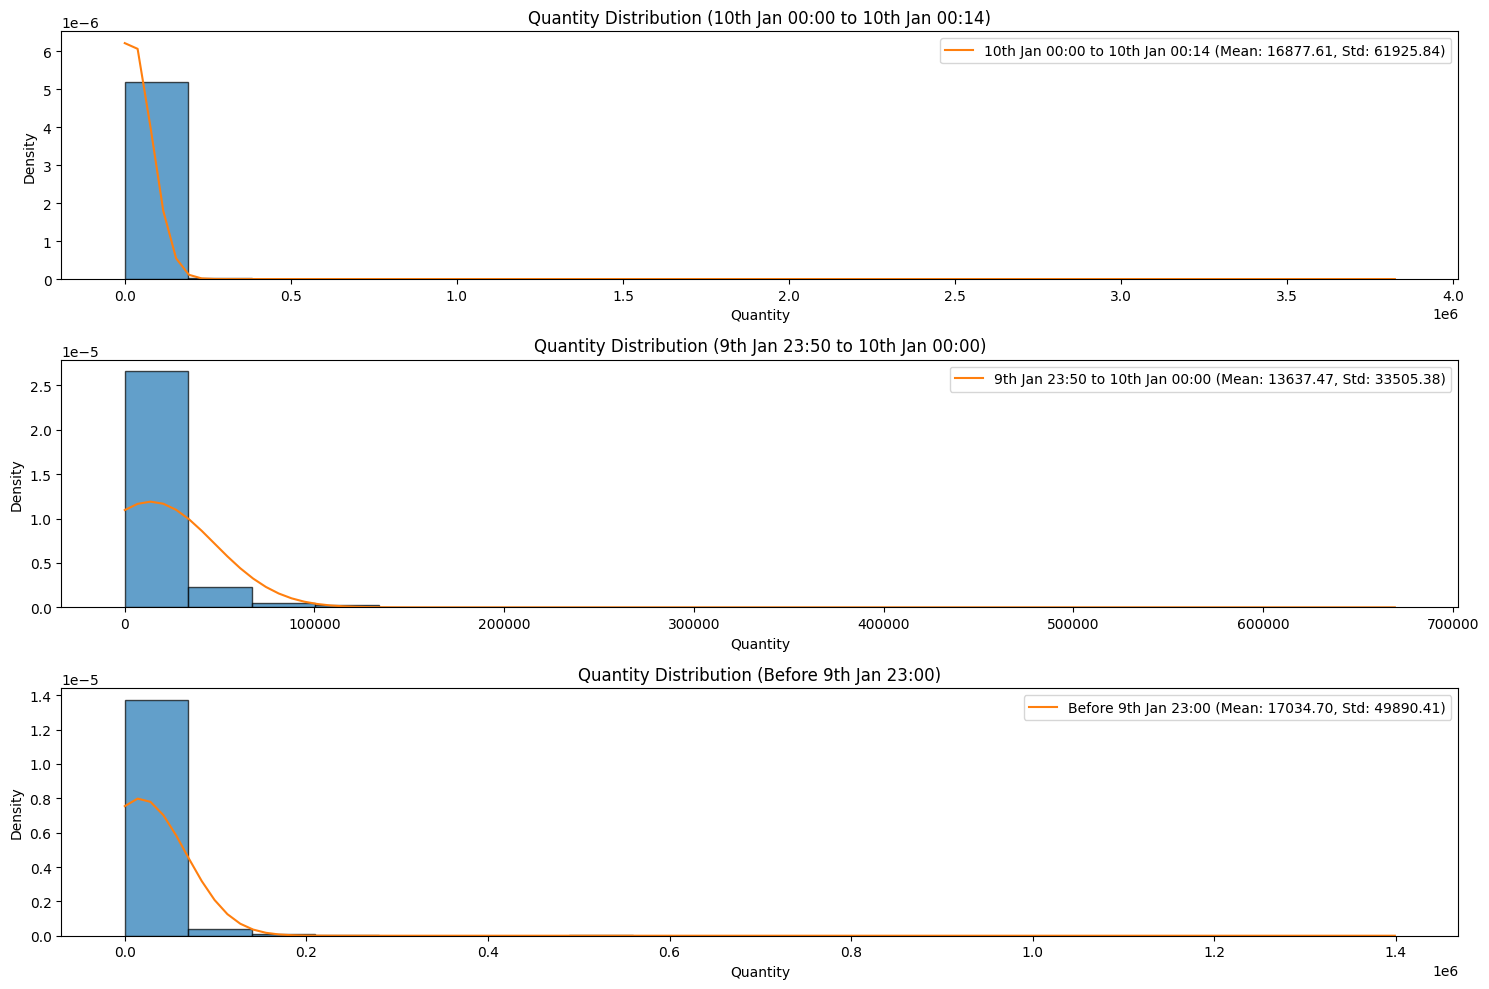

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Load your data into a DataFrame (assuming df is already loaded)
# df = pd.read_csv("your_file.csv")

# Convert 'timestamp' to a datetime object if it's not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define the time ranges
range1_start = pd.Timestamp("2025-01-10 00:00:00")
range1_end = pd.Timestamp("2025-01-10 00:14:00")
range2_start = pd.Timestamp("2025-01-09 23:50:00")
range2_end = pd.Timestamp("2025-01-10 00:00:00")
range3_end = pd.Timestamp("2025-01-09 23:00:00")

# Filter the data for each range
range1 = df[(df['timestamp'] >= range1_start) & (df['timestamp'] < range1_end)]
range2 = df[(df['timestamp'] >= range2_start) & (df['timestamp'] < range2_end)]
range3 = df[df['timestamp'] < range3_end]

range1['q'] = pd.to_numeric(range1['q'], errors='coerce')
range2['q'] = pd.to_numeric(range2['q'], errors='coerce')
range3['q'] = pd.to_numeric(range3['q'], errors='coerce')

# Function to calculate and print stats
def print_stats(range_data, label):
    mean = range_data['q'].mean()
    std = range_data['q'].std()
    lower_bound = mean - std
    upper_bound = mean + std
    print(f"Stats for {label}:")
    print(f"  Mean: {mean:.2f}")
    print(f"  Std Dev: {std:.2f}")
    print(f"  70% Range: {lower_bound:.2f} to {upper_bound:.2f}")
    print("\n")

def plot_bell_curve(range_data, label):
    mean = range_data['q'].mean()
    std = range_data['q'].std()
    x = np.linspace(range_data['q'].min(), range_data['q'].max(), 100)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y, label=f'{label} (Mean: {mean:.2f}, Std: {std:.2f})')

print_stats(range1, "10th Jan 00:00 to 10th Jan 00:14")
print_stats(range2, "9th Jan 23:50 to 10th Jan 00:00")
print_stats(range3, "Before 9th Jan 23:00")

# Plot histograms and bell curves for each range
plt.figure(figsize=(15, 10))

# Range 1
plt.subplot(3, 1, 1)
plt.hist(range1['q'], bins=20, density=True, edgecolor='black', alpha=0.7)
plot_bell_curve(range1, "10th Jan 00:00 to 10th Jan 00:14")
plt.title('Quantity Distribution (10th Jan 00:00 to 10th Jan 00:14)')
plt.xlabel('Quantity')
plt.ylabel('Density')
plt.legend()

# Range 2
plt.subplot(3, 1, 2)
plt.hist(range2['q'], bins=20, density=True, edgecolor='black', alpha=0.7)
plot_bell_curve(range2, "9th Jan 23:50 to 10th Jan 00:00")
plt.title('Quantity Distribution (9th Jan 23:50 to 10th Jan 00:00)')
plt.xlabel('Quantity')
plt.ylabel('Density')
plt.legend()

# Range 3
plt.subplot(3, 1, 3)
plt.hist(range3['q'], bins=20, density=True, edgecolor='black', alpha=0.7)
plot_bell_curve(range3, "Before 9th Jan 23:00")
plt.title('Quantity Distribution (Before 9th Jan 23:00)')
plt.xlabel('Quantity')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
range3['q'].describe()

count    2.552000e+03
mean     1.703470e+04
std      4.989041e+04
min      1.000000e+00
25%      9.430000e+02
50%      5.521500e+03
75%      1.692100e+04
max      1.398957e+06
Name: q, dtype: float64

In [26]:
range2['q'].describe()

count      1201.000000
mean      13637.472107
std       33505.380224
min           1.000000
25%        1303.000000
50%        4266.000000
75%       11871.000000
max      669450.000000
Name: q, dtype: float64

In [27]:
range1['q'].describe()

count    3.710600e+04
mean     1.687761e+04
std      6.192584e+04
min      1.000000e+00
25%      2.143000e+03
50%      4.051000e+03
75%      1.697900e+04
max      3.823843e+06
Name: q, dtype: float64

In [33]:
range1.head(20)

,a,p,q,f,l,T,m,M,timestamp
5875,11519031,0.00821400,2085.0,15985532,15985532,1736467200477,False,True,2025-01-10 00:00:00.477
5876,11519032,0.00821500,1069.0,15985533,15985533,1736467200477,False,True,2025-01-10 00:00:00.477
5877,11519033,0.00821800,6314.0,15985534,15985534,1736467200477,False,True,2025-01-10 00:00:00.477
5878,11519034,0.00821900,32904.0,15985535,15985535,1736467200477,False,True,2025-01-10 00:00:00.477
5879,11519035,0.00822000,13060.0,15985536,15985536,1736467200477,False,True,2025-01-10 00:00:00.477
5880,11519036,0.00822100,53672.0,15985537,15985538,1736467200477,False,True,2025-01-10 00:00:00.477
5881,11519037,0.00822300,121452.0,15985539,15985543,1736467200477,False,True,2025-01-10 00:00:00.477
5882,11519038,0.00822400,291904.0,15985544,15985544,1736467200477,False,True,2025-01-10 00:00:00.477
5883,11519039,0.00822500,913.0,15985545,15985545,1736467200477,False,True,2025-01-10 00:00:00.477
5884,11519040,0.00822600,913.0,15985546,15985546,1736467200477,False,True,2025-01-10 00:00:00.477


In [45]:
import pandas as pd
import plotly.graph_objects as go

# Load your data into a DataFrame (assuming df is already loaded)
# df = pd.read_csv("your_file.csv")

# Convert 'timestamp' to a datetime object if it's not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define the time range for range 1
range1_start = pd.Timestamp("2025-01-09 22:55:00")
range1_end = pd.Timestamp("2025-01-09 23:55:00")

# Filter the data for range 1
range1 = df[(df['timestamp'] >= range1_start) & (df['timestamp'] < range1_end)]

# Function to create candles based on $1000 volume
def create_candles(data):
    candles = []
    current_volume = 0
    start_price = None
    start_time = None
    for i, row in data.iterrows():
        price = pd.to_numeric(row['p'], errors='coerce')
        quantity = pd.to_numeric(row['q'], errors='coerce')
        if start_price is None:
            start_price = price
            start_time = row['timestamp']
        current_volume += price * quantity
        if current_volume >= 1000:
            end_price = price
            end_time = row['timestamp']
            candles.append((start_time, end_time, start_price, end_price))
            current_volume = 0
            start_price = None
    return candles

# Create candles for range1
candles = create_candles(range1.sort_values(by='a', ascending=True))

# Prepare data for Plotly
fig = go.Figure()
for candle in candles:
    start_time, end_time, start_price, end_price = candle
    color = 'green' if end_price >= start_price else 'red'
    fig.add_trace(go.Scatter(
        x=[start_time, end_time],
        y=[start_price, end_price],
        mode='lines',
        line=dict(color=color, width=4),
    ))

# Update layout for interactivity
fig.update_layout(
    title='Interactive Candlestick Plot (Volume >= $1000)',
    xaxis_title='Time',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True,
    template="plotly_white"
)

# Show the plot
fig.show()


In [58]:
import pandas as pd
import plotly.graph_objects as go

# Load your data into a DataFrame (assuming df is already loaded)
# df = pd.read_csv("your_file.csv")

# Convert 'timestamp' to a datetime object if it's not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define the time range for range 1
range1_start = pd.Timestamp("2025-01-09 20:50:00")
range1_end = pd.Timestamp("2025-01-10 00:14:50")

# Filter the data for range 1
range1 = df[(df['timestamp'] >= range1_start) & (df['timestamp'] < range1_end)]

# Function to detect anomalies
def detect_anomalies(data):
    anomalies = []
    price = pd.to_numeric(data['p'], errors='coerce')
    quantity = pd.to_numeric(data['q'], errors='coerce') 
    mean_price = price.mean()
    std_price = price.std()
    mean_quantity = quantity.mean()
    std_quantity = quantity.std()

    for i, row in data.iterrows():
        price = pd.to_numeric(row['p'], errors='coerce')
        quantity = pd.to_numeric(row['q'], errors='coerce')
        if (abs(quantity - mean_quantity) > 3 * std_quantity) and (quantity%100 == 0):
            anomalies.append(row)

    return pd.DataFrame(anomalies)

# Detect anomalies in range1
anomalies = detect_anomalies(range1)

# Function to create candles based on $1000 volume
def create_candles(data):
    candles = []
    current_volume = 0
    start_price = None
    start_time = None
    for i, row in data.iterrows():
        price = pd.to_numeric(row['p'], errors='coerce')
        quantity = pd.to_numeric(row['q'], errors='coerce')
        if start_price is None:
            start_price = price
            start_time = row['timestamp']
        current_volume += price * quantity
        if current_volume >= 1000:
            end_price = price
            end_time = row['timestamp']
            candles.append((start_time, end_time, start_price, end_price))
            current_volume = 0
            start_price = None
    return candles

# Create candles for range1
candles = create_candles(range1.sort_values(by='a', ascending=True))

# Prepare data for Plotly
fig = go.Figure()
for candle in candles:
    start_time, end_time, start_price, end_price = candle
    color = 'green' if end_price >= start_price else 'red'
    fig.add_trace(go.Scatter(
        x=[start_time, end_time],
        y=[start_price, end_price],
        mode='lines',
        line=dict(color=color, width=4),
        name=f"Candle: {start_time} to {end_time}"
    ))

# Highlight anomalies
fig.add_trace(go.Scatter(
    x=anomalies['timestamp'],
    y=anomalies['p'],
    mode='markers',
    marker=dict(color='orange', size=10, symbol='x'),
    name='Anomalies'
))

# Update layout for interactivity
fig.update_layout(
    title='Interactive Candlestick Plot with Anomalies (Volume >= $1000)',
    xaxis_title='Time',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True,
    template="plotly_white"
)

# Show the plot
fig.show()

# Print anomalies
print("Detected anomalies:")
print(anomalies)


Detected anomalies:
              a           p                 q         f         l  \
5966   11519122  0.00837200   650000.00000000  15985685  15985685   
6057   11519213  0.00837200   224000.00000000  15985807  15985807   
6063   11519219  0.00837200   270000.00000000  15985815  15985815   
6072   11519228  0.00837200   300000.00000000  15985829  15985829   
6099   11519255  0.00839700   358000.00000000  15985863  15985863   
6354   11519510  0.00856100  2000000.00000000  15986284  15986293   
9203   11522364  0.00877200   300000.00000000  15991020  15991020   
9438   11522599  0.00863000   300000.00000000  15991362  15991362   
9579   11522740  0.00861400   300000.00000000  15991561  15991561   
10227  11523388  0.00866100   300000.00000000  15992569  15992569   
10265  11523426  0.00865600   231000.00000000  15992615  15992615   
10543  11523704  0.00871400   293000.00000000  15993038  15993043   
10996  11524157  0.00880300   300000.00000000  15993713  15993713   
11033  1152420

In [67]:
import requests
import pandas as pd

def get_top_usdt_pairs_by_volume():
    base_url = "https://api.binance.com"
    ticker_endpoint = "/api/v3/ticker/24hr"

    # Fetch data from Binance API
    response = requests.get(base_url + ticker_endpoint)
    response.raise_for_status()  # Raise an exception for HTTP errors

    # Parse JSON response
    ticker_data = response.json()

    # Filter for USDT pairs and gather relevant information
    usdt_pairs = [
        {
            "symbol": item["symbol"],
            "volume": float(item["quoteVolume"])
        }
        for item in ticker_data
        if item["symbol"].endswith("USDT")
    ]

    # Sort by volume and get the top 100
    sorted_pairs = sorted(usdt_pairs, key=lambda x: x["volume"], reverse=True)[:100]

    # Extract only the symbols
    top_100_symbols = [pair["symbol"] for pair in sorted_pairs]

    return top_100_symbols


try:
    top_usdt_pairs = get_top_usdt_pairs_by_volume()
    print("Top 100 USDT pairs by volume:")
    print(top_usdt_pairs)

    print("Data saved to top_100_usdt_pairs.csv")
except Exception as e:
    print(f"An error occurred: {e}")

Top 100 USDT pairs by volume:
['BTCUSDT', 'ETHUSDT', 'USDCUSDT', 'SOLUSDT', 'XRPUSDT', 'FDUSDUSDT', 'DOGEUSDT', 'SUIUSDT', 'PEPEUSDT', 'ADAUSDT', 'TRXUSDT', 'ENAUSDT', 'BNBUSDT', 'RUNEUSDT', 'USUALUSDT', 'WIFUSDT', 'LINKUSDT', 'HBARUSDT', 'WLDUSDT', 'CGPTUSDT', 'PENGUUSDT', 'TAOUSDT', 'AVAXUSDT', 'XLMUSDT', 'FETUSDT', 'BIOUSDT', 'AAVEUSDT', 'PNUTUSDT', 'ACTUSDT', 'UNIUSDT', 'SHIBUSDT', 'IQUSDT', 'NEIROUSDT', 'APTUSDT', 'LTCUSDT', 'ARBUSDT', 'RENDERUSDT', 'GALAUSDT', 'EURUSDT', 'NEARUSDT', 'DOTUSDT', 'ALGOUSDT', 'FILUSDT', 'FLOKIUSDT', 'FTMUSDT', 'OMUSDT', 'SEIUSDT', 'CRVUSDT', 'MOVEUSDT', 'AIXBTUSDT', '1000SATSUSDT', 'AIUSDT', 'BONKUSDT', 'PHAUSDT', 'ZENUSDT', 'SANDUSDT', 'INJUSDT', 'ORDIUSDT', 'COOKIEUSDT', 'IOUSDT', 'OPUSDT', 'BCHUSDT', 'GASUSDT', 'HIVEUSDT', 'EIGENUSDT', 'GMTUSDT', 'ICPUSDT', 'AGLDUSDT', 'IOSTUSDT', 'TIAUSDT', 'ETHFIUSDT', 'DUSDT', 'IOTAUSDT', 'VETUSDT', 'ENSUSDT', 'BOMEUSDT', 'PENDLEUSDT', 'ARKMUSDT', 'JASMYUSDT', 'LDOUSDT', 'ZROUSDT', 'COWUSDT', 'WBTCUSDT', 'STMXU

In [68]:
top_usdt_pairs[top_usdt_pairs['symbol'] == 'ZENUSDT']

TypeError: list indices must be integers or slices, not str

In [69]:
len(top_usdt_pairs)

100